In [1]:
# This notebook was used to generate the screenshot on the main landing page
from mantid.simpleapi import ReflectometryISISLoadAndProcess, Stitch1DMany
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt

#Some magic to tell matplotlib how to behave in IPython Notebook. Use '%matplotlib nbagg' for interactive plots, if available.
%matplotlib inline

In [2]:
w1 = ReflectometryISISLoadAndProcess(InputRunList='13460', ThetaIn=0.7, 
                                     WavelengthMin=1.5, WavelengthMax=17, I0MonitorIndex=2,
                                     MonitorBackgroundWavelengthMin=17, MonitorBackgroundWavelengthMax=18,
                                     MonitorIntegrationWavelengthMin=4, MonitorIntegrationWavelengthMax=10,
                                     StartOverlap=10, EndOverlap=12, MomentumTransferMin=0.00903,
                                     MomentumTransferStep=0.03403,
                                     MomentumTransferMax=0.1017,
                                     OutputWorkspaceBinned='IvsQ_binned_13460', OutputWorkspace='IvsQ_13460')

In [3]:
w2 = ReflectometryISISLoadAndProcess(InputRunList='13462', ThetaIn=2.3,
                                     WavelengthMin=1.5, WavelengthMax=17, I0MonitorIndex=2,
                                     MonitorBackgroundWavelengthMin=17, MonitorBackgroundWavelengthMax=18,
                                     MonitorIntegrationWavelengthMin=4, MonitorIntegrationWavelengthMax=10,
                                     StartOverlap=10, EndOverlap=12, MomentumTransferMin=0.029678,
                                     MomentumTransferStep=0.03403, MomentumTransferMax=0.33407,
                                     OutputWorkspaceBinned='IvsQ_binned_13462', OutputWorkspace='IvsQ_13462')

In [4]:
stitched = Stitch1DMany(InputWorkspaces='IvsQ_13460,IvsQ_13462', OutputWorkspace='IvsQ_13460_13462',
                        Params='-0.034028', OutScaleFactors='1.59726')

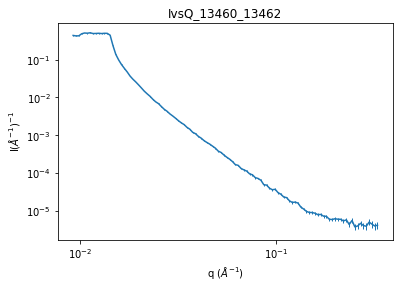

In [5]:
fig, axes = plt.subplots(subplot_kw={'projection': 'mantid'})
axes.errorbar(stitched.OutputWorkspace, wkspIndex=0, color='#1f77b4', elinewidth=1.0,
              label='IvsQ_13460_13462: spec 4')
axes.set_title('IvsQ_13460_13462')
axes.set_xlabel('q ($\\AA^{-1}$)')
axes.set_ylabel('I($\\AA^{-1}$)$^{-1}$')
axes.set_xlim([0.0076822, 0.39363])
axes.set_ylim([1.6648e-06, 0.96869])
axes.set_xscale('log')
axes.set_yscale('log')